In [1]:
from google.colab import drive
import sys
drive.mount('/content/gdrive')
gdrive_path = '/content/gdrive/MyDrive/AIM/'
sys.path.append(gdrive_path)
!ls -l /content/gdrive/MyDrive/AIM/*.py

Mounted at /content/gdrive
-rw------- 1 root root  3394 Jun  4 21:44 /content/gdrive/MyDrive/AIM/aim_overlayer.py
-rw------- 1 root root  8829 Jun  5 21:15 /content/gdrive/MyDrive/AIM/aim_rater.py
-rw------- 1 root root 10304 Jun  4 19:38 /content/gdrive/MyDrive/AIM/aim_scanner.py
-rw------- 1 root root  2575 Jun  6 21:13 /content/gdrive/MyDrive/AIM/aim_tuner.py
-rw------- 1 root root  7109 Jun  3 14:17 /content/gdrive/MyDrive/AIM/aim_util.py
-rw------- 1 root root 12888 Jun  7 19:23 /content/gdrive/MyDrive/AIM/aim_xformer.py


In [ ]:
# !ls -l /content/gdrive/MyDrive/AIM
#!cat /content/gdrive/MyDrive/AIM/aim_tuner.py
#!cat /content/gdrive/MyDrive/AIM/aim_xformer.py

In [2]:
import aim_util
#import aim_tuner
import aim_xformer
#import aim_scanner
#import aim_rater
#import aim_overlayer

In [3]:
!pip install icecream
from icecream import ic

In [ ]:
# import aim_tuner.tuner as tuner

In [4]:
####################################################################
from enum import Enum
class xform_nickname(Enum):
    XFORM0 = "Source"
    XFORM1 = "GrayScale"
    XFORM2 = "Threshold"
    XFORM3 = "Noise"
    XFORM4 = "Sharpen"
    XFORM5 = "Contrast"
####################################################################
from types import SimpleNamespace
import cv2

tuner = SimpleNamespace(

    # source image
    source_image_path = '/content/gdrive/MyDrive/AIM/citizen_1864_rescan.jpg',
    # transform prefix
    xform_prefix_list = ['xform0', 'xform1', 'xform2', 'xform3', 'xform4', 'xform5'],

    # pipeline file paths
    #gdrive_path = '/content/gdrive/MyDrive/AIM'
    source_base = 'citizen_',

    # RATING: percent prediction exact & partial match to groundtruth
    # noise -> xform3a with top percent->79.30
    # grayscale -> xform1c with top percent->78.19
    # source -> (no transform) xform0 with top percent->77.75
    # contrast -> xform5a with top percent->77.31
    # threshold -> xform2a with top percent->61.45
    # sharpen ->xform4b with top percent->55.50

    # XFORM1 = "GrayScale"
    grayscale_intensity_A = 0.0,    # 77.53
    grayscale_intensity_B = 0.5,    # 77.97
    grayscale_intensity_C = 1.3,    # xform1c with top percent->78.19
    grayscale_intensity_D = 1.8,    # 78.19

    # XFORM2 = "Threshold"
    thresh_val_A=127, thresh_type_A=cv2.THRESH_BINARY,      # xform5a with top percent->61.45
    thresh_val_B=50, thresh_type_B=cv2.THRESH_BINARY,       # 11.45
    thresh_val_C=127, thresh_type_C=cv2.THRESH_TRUNC,       # 61.45
    thresh_val_D=75, thresh_type_D=cv2.THRESH_TOZERO_INV,   # 30.61

    # XFORM3 = "Noise"
    noise_kernel_size_A=3,     # xform3a with top percent->79.30
    noise_kernel_size_B=7,     # 77.31
    noise_kernel_size_C=21,    # 45.59
    noise_kernel_size_D=31,    # 2.86

    # XFORM4 = "Sharpen"
    sharpen_kernel_size_A=3,     # xform3a with top percent->79.30
    sharpen_kernel_size_B=7,     # 77.31
    sharpen_kernel_size_C=21,    # 45.59
    sharpen_kernel_size_D=31,    # 2.86

    # XFORM5 = "Contrast"
    contrast_factor_A=1, brightness_factor_A=0,     # xform5a with top percent->77.31
    contrast_factor_B=1, brightness_factor_B=32,    # 76.43
    contrast_factor_C=2, brightness_factor_C=32,    # 27.53
    contrast_factor_D=2, brightness_factor_D=64,    # 32.15

)

In [ ]:
#print(f"{aim_tuner.tuner}")
ic(tuner)

ic| tuner: namespace(source_image_path='/content/gdrive/MyDrive/AIM/citizen_1864_rescan.jpg',
                     xform_prefix_list=['xform0',
                                        'xform1',
                                        'xform2',
                                        'xform3',
                                        'xform4',
                                        'xform5'],
                     source_base='citizen_')


namespace(source_image_path='/content/gdrive/MyDrive/AIM/citizen_1864_rescan.jpg',
          xform_prefix_list=['xform0',
                             'xform1',
                             'xform2',
                             'xform3',
                             'xform4',
                             'xform5'],
          source_base='citizen_')

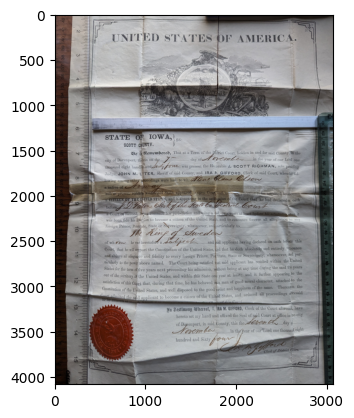

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#aim_util.show_image(aim_tuner.tuner.source_image_path)
img = mpimg.imread(tuner.source_image_path)
plt.imshow(img)


# **Apply All Transforms**

In [ ]:
!ls -l /content/gdrive/MyDrive/AIM/citizen_xform*.jpg

-rw------- 1 root root  3663644 Jun  2 20:54 /content/gdrive/MyDrive/AIM/citizen_xform0.jpg
-rw------- 1 root root  3890679 Jun  2 21:43 /content/gdrive/MyDrive/AIM/citizen_xform1a.jpg
-rw------- 1 root root  3004018 Jun  2 21:43 /content/gdrive/MyDrive/AIM/citizen_xform1b.jpg
-rw------- 1 root root  4204301 Jun  2 21:43 /content/gdrive/MyDrive/AIM/citizen_xform1c.jpg
-rw------- 1 root root  4204301 Jun  2 21:43 /content/gdrive/MyDrive/AIM/citizen_xform1d.jpg
-rw------- 1 root root  3890679 Jun  2 21:43 /content/gdrive/MyDrive/AIM/citizen_xform1.jpg
-rw------- 1 root root  4282849 Jun  2 21:50 /content/gdrive/MyDrive/AIM/citizen_xform2a.jpg
-rw------- 1 root root  2761919 Jun  2 21:50 /content/gdrive/MyDrive/AIM/citizen_xform2b.jpg
-rw------- 1 root root  4282849 Jun  2 21:50 /content/gdrive/MyDrive/AIM/citizen_xform2c.jpg
-rw------- 1 root root  3566273 Jun  2 21:50 /content/gdrive/MyDrive/AIM/citizen_xform2d.jpg
-rw------- 1 root root  3566273 Jun  2 21:48 /content/gdrive/MyDrive/AIM

base->citizen_, prefix->['xform0', 'xform1', 'xform2', 'xform3', 'xform4', 'xform5']


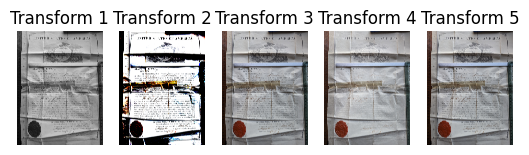

In [5]:
aim_xformer.apply_xform(gdrive_path, tuner.source_image_path, tuner.source_base, tuner.xform_prefix_list)

# **Greyscale**

In [6]:
# Display images side-by-side
#fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Adjust figsize if needed

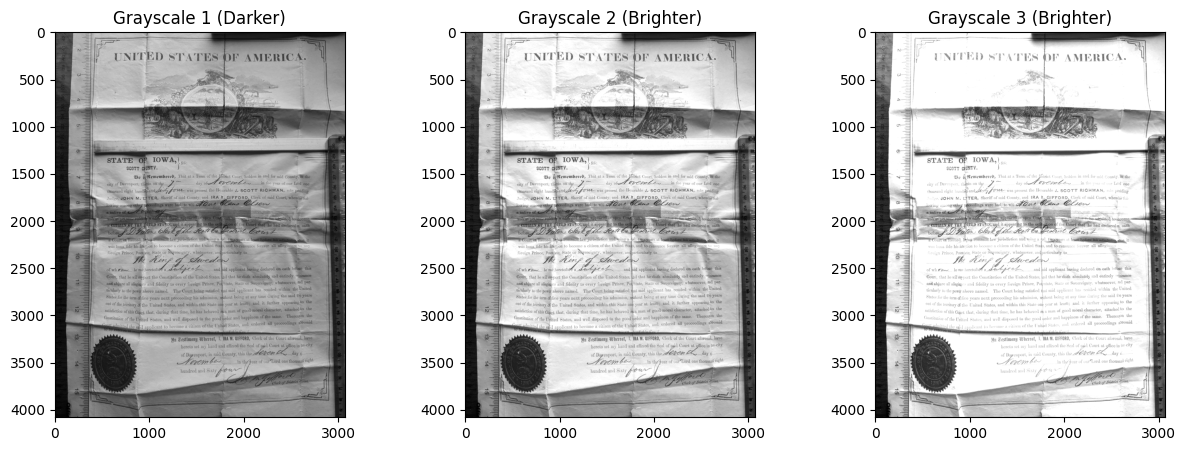

In [6]:
aim_xformer.apply_xform_grayscale(gdrive_path, tuner.source_image_path, tuner.source_base, tuner.xform_prefix_list[1], 0.5, 1.3, 1.8)

In [13]:
# import os
# def apply_xform_grayscale(gdrive_path, image_path, source_base, xform_prefix, intensity_a=0.7, intensity_b=1.3, intensity_c=1.8):
#     # read image
#     img = mpimg.imread(image_path)

#     # Load an image
#     image = img
#     # image = cv2.imread('your_image.jpg')  # Replace 'your_image.jpg' with your image file

#     # Apply grayscale multiple times with varying intensity
#     result1 = aim_xformer.grayscale(image)
#     result2 = aim_xformer.grayscale(image, intensity_a)
#     result3 = aim_xformer.grayscale(image, intensity_b)
#     result4 = aim_xformer.grayscale(image, intensity_c)

#     # result2 = cv2.multiply(grayscale(image), intensity_a)  # Slightly darker
#     # result3 = cv2.multiply(grayscale(image), intensity_b)  # Slightly brighter

#     # cv2.imwrite(os.path.join(gdrive_path, 'citizen_xform1a.jpg'), result1)
#     cv2.imwrite(os.path.join(gdrive_path, source_base + xform_prefix + 'a.jpg'), result1)

#     # Display images side-by-side
#     fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Adjust figsize if needed

#     axes[0].imshow(result2, cmap='gray')
#     axes[0].set_title('Grayscale 1 (Darker)')
#     # cv2.imwrite(os.path.join(gdrive_path, 'citizen_xform1b.jpg'), result2)
#     cv2.imwrite(os.path.join(gdrive_path, source_base + xform_prefix + 'b.jpg'), result2)

#     axes[1].imshow(result3, cmap='gray')
#     axes[1].set_title('Grayscale 2 (Brighter)')
#     # cv2.imwrite(os.path.join(gdrive_path, 'citizen_xform1c.jpg'), result3)
#     cv2.imwrite(os.path.join(gdrive_path, source_base + xform_prefix + 'c.jpg'), result3)

#     axes[2].imshow(result4, cmap='gray')
#     axes[2].set_title('Grayscale 3 (Brighter)')
#     # cv2.imwrite(os.path.join(gdrive_path, 'citizen_xform1d.jpg'), result3)
#     cv2.imwrite(os.path.join(gdrive_path, source_base + xform_prefix + 'd.jpg'), result4)

#     plt.show()

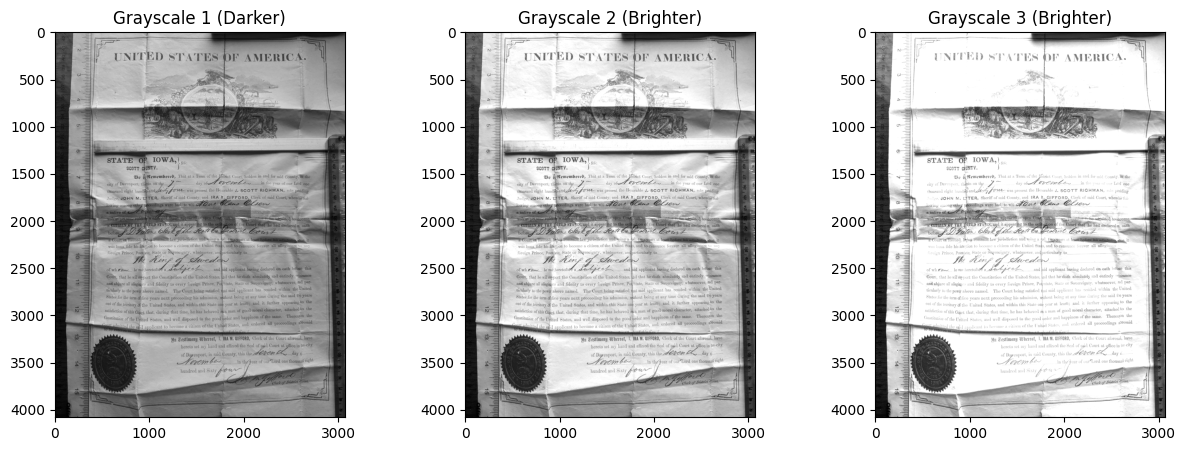

In [14]:
#apply_xform_grayscale(gdrive_path, tuner.source_image_path, tuner.source_base, tuner.xform_prefix_list[1], 0.5, 1.3, 1.8)

# **Threshold**

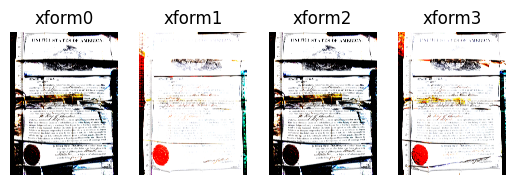

In [ ]:
aim_xformer.apply_xform_threshold(gdrive_path, tuner.source_image_path, tuner.source_base, tuner.xform_prefix_list[2])

# **Noise Reduction**

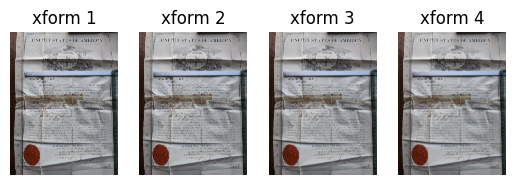

In [ ]:
aim_xformer.apply_xform_noise(gdrive_path, tuner.source_image_path, tuner.source_base, tuner.xform_prefix_list[3])

# **Sharpen**

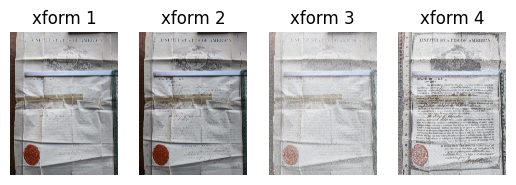

In [ ]:
aim_xformer.apply_xform_sharpen(gdrive_path, tuner.source_image_path, tuner.source_base, tuner.xform_prefix_list[4])

# **contrast_and_brightness**

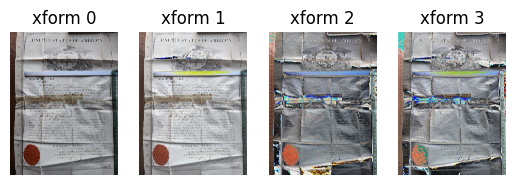

In [ ]:
aim_xformer.apply_xform_contrast_and_brightness(gdrive_path, tuner.source_image_path, tuner.source_base, tuner.xform_prefix_list[5])

##########################################################################